# Week 2 Part 2 - Network Analysis: Centrality Measures
### The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

Possible changes to make:
- remove data.info() since the data types seem clear from the first five rows of the data, and you can determine the length of the data with the calcualtion for count from data.describe()
- separate different chunks of code
- when writing explanations, add them in the text chunks, not as comments in the code - comments in the code are for other developers or yourself, not for presentations
- Format the minimum degree, average degree, maximum degree, and degree range section slightly differently
- Added some graphs with age ranges and salary ranges as nodes (the salary ranges shows good information, maybe keep that one)
- One set of graphs shows users in certain salary ranges and then their ages
- Will need to explain the results of the snowball sampling function better (what do the edges represent?)
- Remove some graphs possibly
- Could add a graph that differentiates between purchase vs no purchase


# Loading the data & EDA

For this project, we will examine the connections among users in a dataset regarding whether or not users purchased an item. The data comes from the Social Network Ads Dataset on Kaggle at the following website: https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/hbedros/centrality-measures/main/data/Social_Network_Ads.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())






    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


This section checks for any missing values. It appears the data does not contain any missing values.

In [ ]:

# Check for any missing values
print(data.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In the table below, the summary statistics are clearly shown. These statistics are used to detect trends in the data and show the structure of different variables.

In [ ]:
# Summary statistics of the dataset
print(data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


Since one of the factors analyzed in this assignment is age, the range is below.

In [ ]:
# Age range
print(f"Age ranges from {data['Age'].min()} to {data['Age'].max()} years")

Age ranges from 18 to 60 years


### Interpretation of the Data Overview

#### Data Sample
- **Columns**: User ID, Gender, Age, Estimated Salary, Purchased.

#### Data Information
- **Entries**: 400 users.
- **No Missing Values**: All columns have 400 entries.
- **Data Types**: Mostly integers, Gender is a string.

#### Summary Statistics
- **Age**: 18 to 60 years.
- **Estimated Salary**: 15,000 to 150,000.
- **Purchased**: 0 (not purchased) or 1 (purchased).
- **Percentiles**:
  - 25% of users are 30 or younger, earn 43,000 or less.
  - 50% of users are 37 or younger, earn 70,000 or less.
  - 75% of users are 46 or younger, earn 88,000 or less.

# Creating a Nodal Network

Now, we will partition our data into nodes and edges in order to determine the degree of connectivity among users based on their ages. We will also examine differences based on gender later in this analysis.

In [ ]:
# Create a graph from the data
g = nx.Graph()

# We add nodes (users) with attributes (gender, age, salary, purchased)
for index, row in data.iterrows():
    g.add_node(row['User ID'], gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

# We add edges (connections) between users if they have the same age
# This is hypothetical connection
for i, node1 in enumerate(g.nodes(data=True)):
    for j, node2 in enumerate(g.nodes(data=True)):
        if i != j and node1[1]['age'] == node2[1]['age']:
            g.add_edge(node1[0], node2[0])

# Calculating Degree and Eigenvector Centrality

Next, we will calculate the degree and eigenvector centrality among nodes in order to determine the number of connections each user has (degree centrality), as well as the influence of nodes within this network (eigenvector centrality).

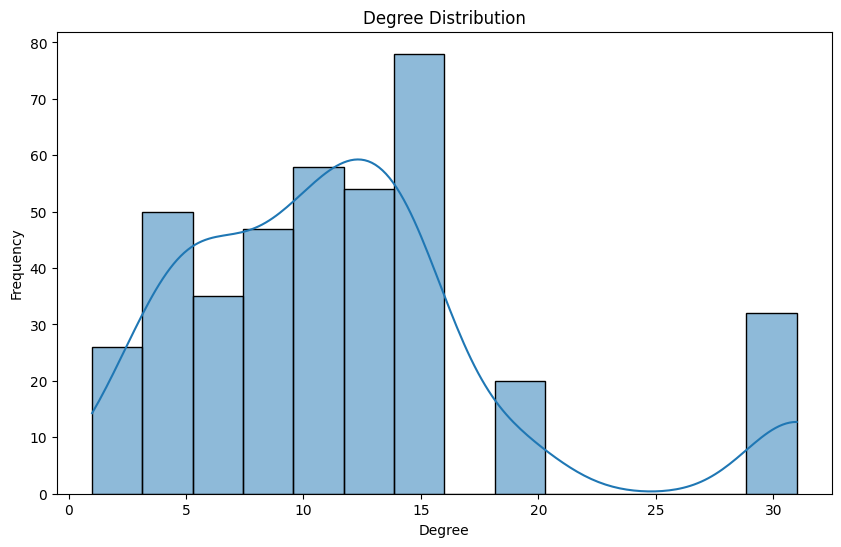

In [ ]:
# Degree centrality (number of connections each user has)
degree_centrality = nx.degree_centrality(g)

# Eigenvector centrality (importance of each user based on connections)
eigenvector_centrality = nx.eigenvector_centrality(g)

# Adding centrality measures to the dataset
data['degree_centrality'] = data['User ID'].map(degree_centrality)
data['eigenvector_centrality'] = data['User ID'].map(eigenvector_centrality)

# Plotting the degree distribution (how many connections users have)
degrees = [val for (node, val) in g.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Interpretation of the Degree Distribution Graph

- **Most Connections**: Most users have around 15 connections.
- **Peaks**: There are peaks at 5, 10, 15, and 30 connections.
- **Range**: Users have between 0 to 31 connections.
- **Gap**: Few users have between 20 to 25 connections.

This graph shows how many connections users typically have in the network.


In [ ]:
# The top users by degree centrality (most connected users)
top_users = data.nlargest(10, 'degree_centrality')
print("Top 10 Users by Degree Centrality:")
print(top_users[['User ID', 'degree_centrality']])

bottom_users = data.nsmallest(10, 'degree_centrality')
print("\n Bottom 10 Users by Degree Centrality:")
print(bottom_users[['User ID', 'degree_centrality']])

# Minimum, Average, and Range of Degree
min_degree = min(degrees)
avg_degree = sum(degrees) / len(degrees)
max_degree = max(degrees)

print("\n")
print(f"Minimum Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Maximum Degree: {max_degree}")
print(f"Degree Range:   {max_degree - min_degree}")

Top 10 Users by Degree Centrality:
     User ID  degree_centrality
1   15810944           0.077694
9   15727311           0.077694
35  15713144           0.077694
42  15772798           0.077694
53  15671655           0.077694
83  15711218           0.077694
89  15682268           0.077694
95  15709441           0.077694
96  15710257           0.077694
98  15575694           0.077694

 Bottom 10 Users by Degree Centrality:
      User ID  degree_centrality
250  15810075           0.002506
382  15715622           0.002506
206  15654230           0.005013
227  15685346           0.005013
243  15769596           0.005013
245  15722061           0.005013
262  15672821           0.005013
270  15680752           0.005013
292  15625395           0.005013
297  15705298           0.005013


Minimum Degree: 1
Average Degree: 11.76
Maximum Degree: 31
Degree Range:   30


### Interpretation of the Top Users by Degree Centrality

#### Top 10 Users by Degree Centrality
- **Top Users**: The top 10 users listed all have the same degree centrality value of 0.077694.
  - This means these users have the highest number of connections in the network.

#### Bottom 10 Users b y Degree Centrality
- **Bottom Users**: The bottom 10 users listed have degree centrality values ranging from 0.0025 to 0.005
  - These users have the fewest number of connections in the network

#### Degree Statistics
- **Minimum Degree**: 1
  - The user with the fewest connections has 1 connection.
- **Average Degree**: 11.76
  - On average, each user has about 12 connections.
- **Maximum Degree**: 31
  - The user with the most connections has 31 connections.
- **Degree Range**: 30
  - The difference between the maximum and minimum number of connections is 30.

This summary helps us understand the connectivity of users in the network, highlighting the most connected users and providing an overview of how connected users are on average.

In [ ]:
top_users_eigen = data.nlargest(10, 'eigenvector_centrality')
print("Top 10 Users by Eigenvector Centrality:")
print(top_users_eigen[['User ID', 'eigenvector_centrality']])

bottom_users_eigen = data.nsmallest(10, 'eigenvector_centrality')
print("\n Bottom 10 Users by Eigenvector Centrality:")
print(bottom_users_eigen[['User ID', 'eigenvector_centrality']])

Top 10 Users by Eigenvector Centrality:
     User ID  eigenvector_centrality
1   15810944                0.176777
9   15727311                0.176777
35  15713144                0.176777
42  15772798                0.176777
53  15671655                0.176777
83  15711218                0.176777
89  15682268                0.176777
95  15709441                0.176777
96  15710257                0.176777
98  15575694                0.176777

 Bottom 10 Users by Eigenvector Centrality:
      User ID  eigenvector_centrality
250  15810075            2.339620e-24
382  15715622            2.339620e-24
206  15654230            5.186558e-21
227  15685346            5.186558e-21
243  15769596            5.186558e-21
245  15722061            5.186558e-21
262  15672821            5.186558e-21
270  15680752            5.186558e-21
292  15625395            5.186558e-21
297  15705298            5.186558e-21


### Interpretations of Eigenvector Centrality

The top and bottom 10 users based on eigenvector centrality perfectly mirror the users with the top and bottom 10 degree centrality values, indicating that the top 10 users listed have the most connections and are the most influential nodes in this network, and the bottom 10 have the fewest connections and are the least influential in this network.

## Visualizations

Now, we will create network graphs to illustrate the connections among each node based on their ages. In addition to this, we will view differences among nodal connections and centrality by gender. Specifically, red nodes will represent female IDs, whereas blue nodes will represent male IDs.

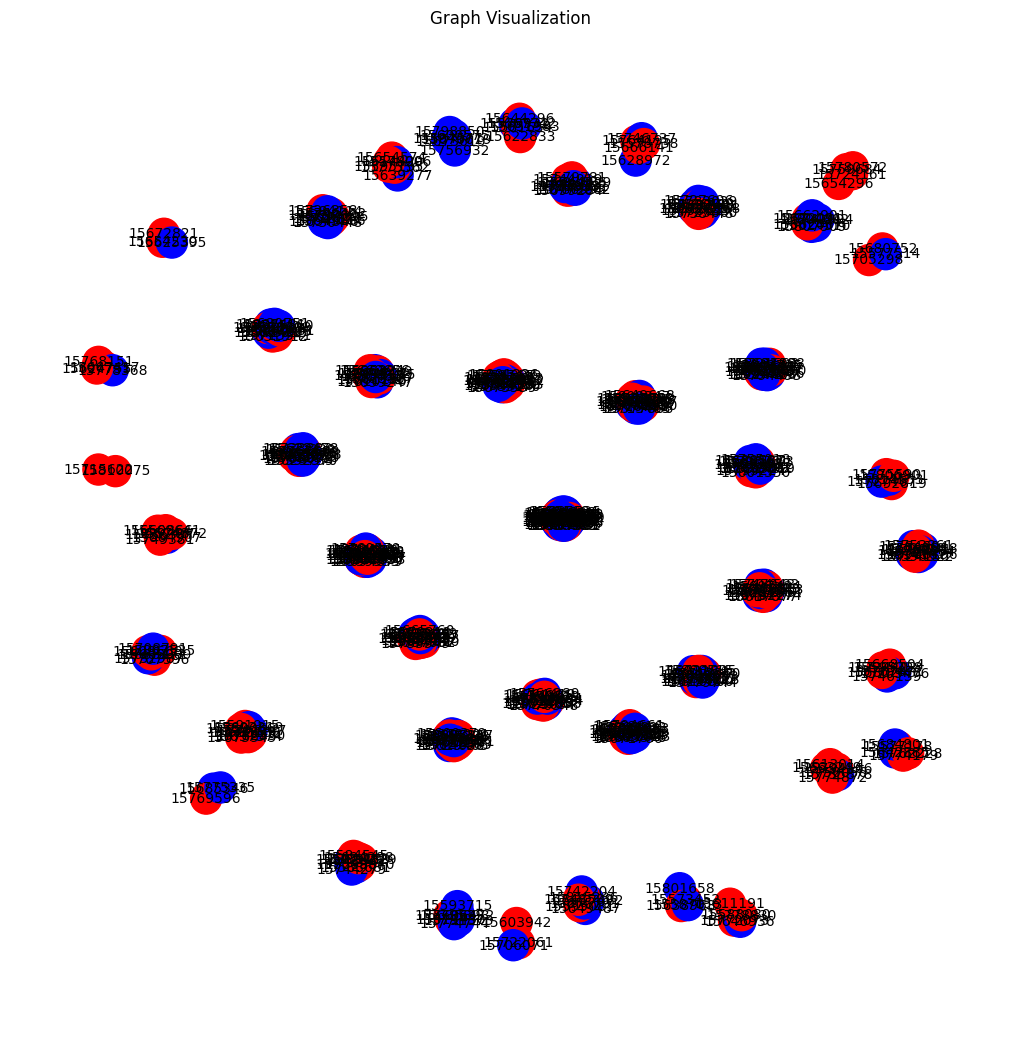

In [ ]:
color_map = {'Male': 'blue', 'Female': 'red'}

colors = [color_map[g.nodes[node]['gender']] for node in g.nodes]

plt.figure(figsize= (10,10))
nx.draw(g, node_color = colors, with_labels = True, node_size=500, font_size=10, font_color='black', edge_color='gray')
plt.title('Graph Visualization')
plt.show()



The code below is a test. This will likely be deleted for the final result.

Nodes: [(19, {'type': 'age'}), (35, {'type': 'age'}), (26, {'type': 'age'}), (27, {'type': 'age'}), (32, {'type': 'age'}), (25, {'type': 'age'}), (20, {'type': 'age'}), (18, {'type': 'age'}), (29, {'type': 'age'}), (47, {'type': 'age'}), (45, {'type': 'age'}), (46, {'type': 'age'}), (48, {'type': 'age'}), (49, {'type': 'age'}), (31, {'type': 'age'}), (21, {'type': 'age'}), (28, {'type': 'age'}), (33, {'type': 'age'}), (30, {'type': 'age'}), (23, {'type': 'age'}), (24, {'type': 'age'}), (22, {'type': 'age'}), (59, {'type': 'age'}), (34, {'type': 'age'}), (39, {'type': 'age'}), (38, {'type': 'age'}), (37, {'type': 'age'}), (42, {'type': 'age'}), (40, {'type': 'age'}), (36, {'type': 'age'}), (41, {'type': 'age'}), (58, {'type': 'age'}), (55, {'type': 'age'}), (52, {'type': 'age'}), (60, {'type': 'age'}), (56, {'type': 'age'}), (53, {'type': 'age'}), (50, {'type': 'age'}), (51, {'type': 'age'}), (57, {'type': 'age'}), (44, {'type': 'age'}), (43, {'type': 'age'}), (54, {'type': 'age'}), (15

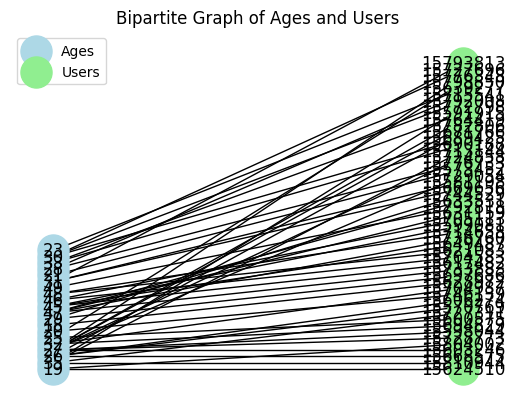

In [ ]:
# Create a bipartite graph
g2 = nx.Graph()

# Add age nodes
ages = data['Age'].unique()
for age in ages:
    g2.add_node(age, type='age')

# Add user nodes with attributes
for index, row in data.iterrows():
    user_node = row['User ID']
    g2.add_node(user_node, type='user', gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

    # Add edges between user nodes and their respective age nodes
    g2.add_edge(user_node, row['Age'])

# Now you have a bipartite graph with ages and users as nodes and edges representing the age of the users
print("Nodes:", g2.nodes(data=True))
print("Edges:", g2.edges(data=True))



import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph
data1 = data.head(50)

g3 = nx.Graph()

# Add age nodes
ages = data1['Age'].unique()
for age in ages:
    g3.add_node(age, type='age')

# Add user nodes with attributes
for index, row in data1.iterrows():
    user_node = row['User ID']
    g3.add_node(user_node, type='user', age=row['Age'], salary=row['EstimatedSalary'])

    # Add edges between user nodes and their respective age nodes
    g3.add_edge(user_node, row['Age'])

# Plotting the graph
# Separate nodes by type for distinct styling
age_nodes = [node for node, data1 in g3.nodes(data=True) if data1['type'] == 'age']
user_nodes = [node for node, data1 in g3.nodes(data=True) if data1['type'] == 'user']

pos = {}
# Setting positions for nodes
pos.update((node, (1, index)) for index, node in enumerate(age_nodes))  # X-axis: 1 for ages
pos.update((node, (2, index)) for index, node in enumerate(user_nodes))  # X-axis: 2 for users

# Draw the nodes
nx.draw_networkx_nodes(g3, pos, nodelist=age_nodes, node_color='lightblue', node_size=500, label='Ages')
nx.draw_networkx_nodes(g3, pos, nodelist=user_nodes, node_color='lightgreen', node_size=500, label='Users')

# Draw the edges
nx.draw_networkx_edges(g3, pos)

# Draw the labels
nx.draw_networkx_labels(g3, pos)

# Plot customization
plt.legend(scatterpoints=1)
plt.title('Bipartite Graph of Ages and Users')
plt.axis('off')
plt.show()


For different age groups. We may not keep this section either.

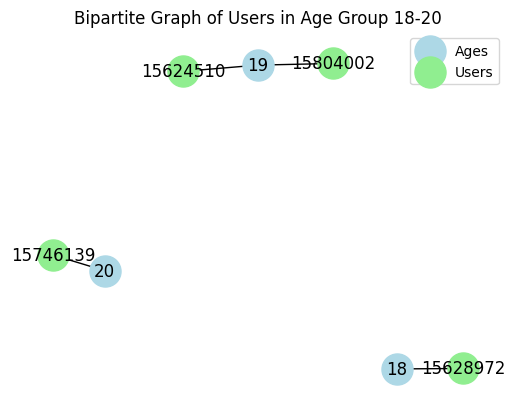

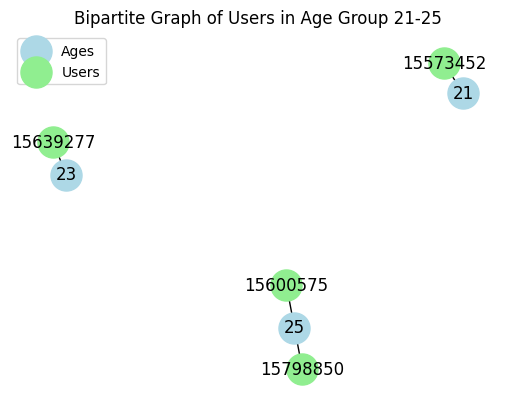

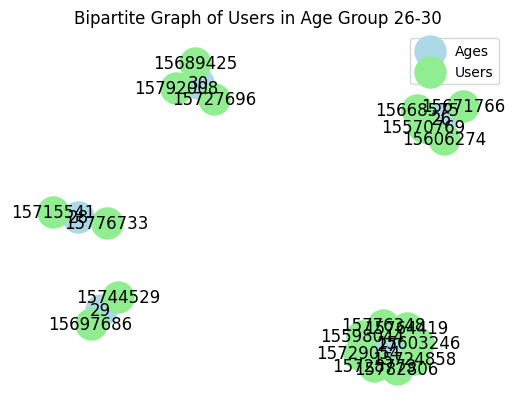

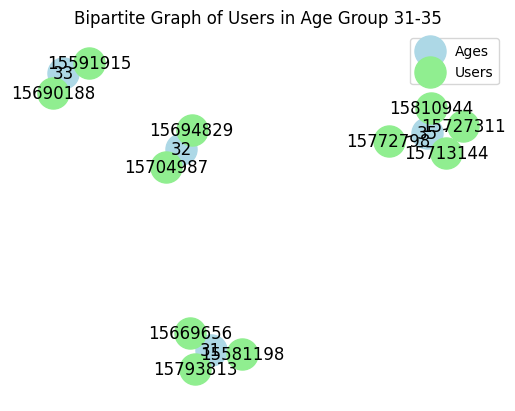

No data available for age group 36-40


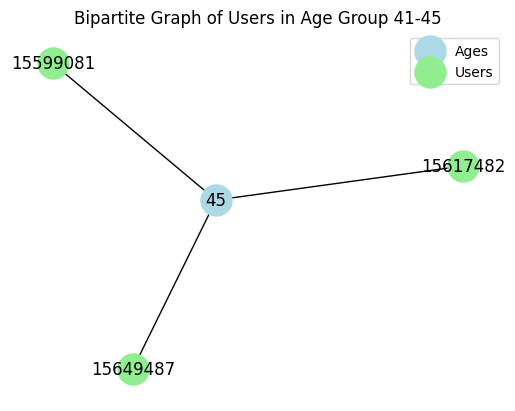

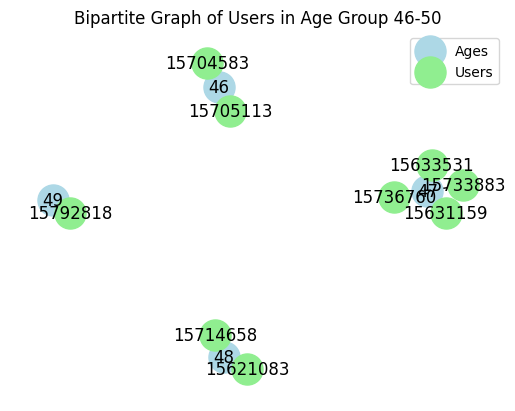

No data available for age group 51-55
No data available for age group 56-60


In [ ]:
# Define age groups
age_groups = {
    '18-20': (18, 20),
    '21-25': (21, 25),
    '26-30': (26, 30),
    '31-35': (31, 35),
    '36-40': (36, 40),
    '41-45': (41, 45),
    '46-50': (46, 50),
    '51-55': (51, 55),
    '56-60': (56, 60)
}

# Function to create and plot graph for a specific age group
def plot_age_group_graph(data, age_group_name, age_range):
    # Filter data for the specific age group
    age_group_data = data[(data1['Age'] >= age_range[0]) & (data['Age'] <= age_range[1])]

    if age_group_data.empty:
        print(f"No data available for age group {age_group_name}")
        return

    # Create bipartite graph
    g2 = nx.Graph()

    # Add age nodes
    ages = age_group_data['Age'].unique()
    for age in ages:
        g2.add_node(age, type='age')

    # Add user nodes with attributes
    for index, row in age_group_data.iterrows():
        user_node = row['User ID']
        g2.add_node(user_node, type='user', gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

        # Add edges between user nodes and their respective age nodes
        g2.add_edge(user_node, row['Age'])

    pos = nx.spring_layout(g2, seed=42)

    # Plotting the graph
    # Use spring layout to spread out nodes
    pos = nx.spring_layout(g2, seed=42)

    # Separate nodes by type for distinct styling
    age_nodes = [node for node, node_data in g2.nodes(data=True) if node_data['type'] == 'age']
    user_nodes = [node for node, node_data in g2.nodes(data=True) if node_data['type'] == 'user']

    # Draw the nodes
    nx.draw_networkx_nodes(g2, pos, nodelist=age_nodes, node_color='lightblue', node_size=500, label='Ages')
    nx.draw_networkx_nodes(g2, pos, nodelist=user_nodes, node_color='lightgreen', node_size=500, label='Users')

    # Draw the edges
    nx.draw_networkx_edges(g2, pos)

    # Draw the labels
    nx.draw_networkx_labels(g2, pos)

    # Plot customization
    plt.legend(scatterpoints=1)
    plt.title(f'Bipartite Graph of Users in Age Group {age_group_name}')
    plt.axis('off')
    plt.show()

# Plot graphs for each age group
for age_group_name, age_range in age_groups.items():
    plot_age_group_graph(data1, age_group_name, age_range)



The graphs below group by salary ranges. They create different graphs for better visualization. Whenthey are all on a graph together, overlapping makes it hard to see the results.

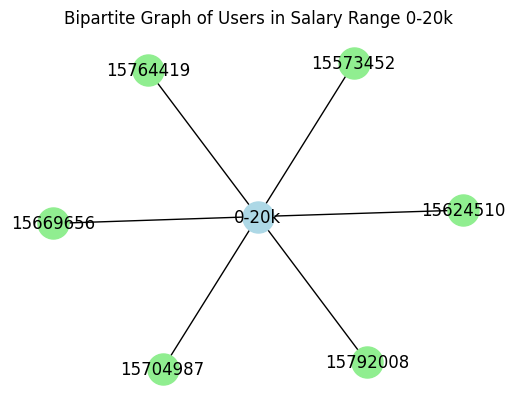

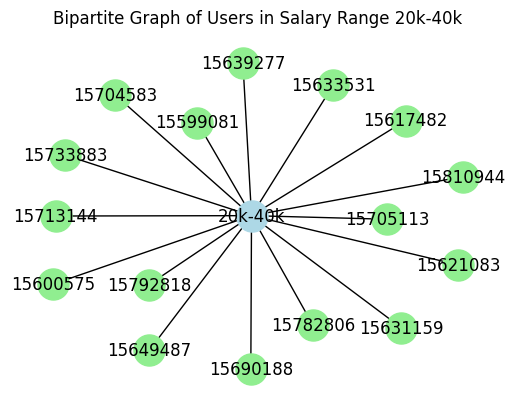

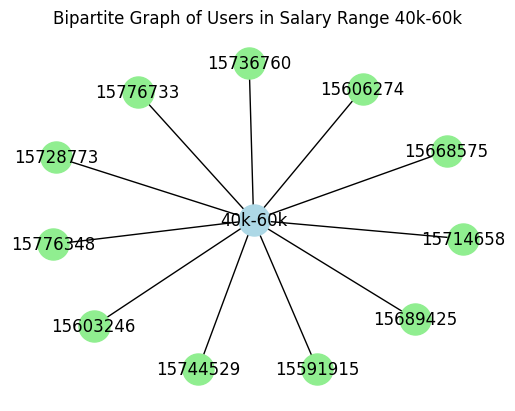

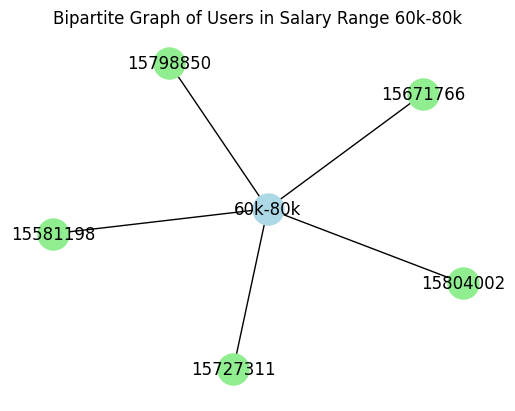

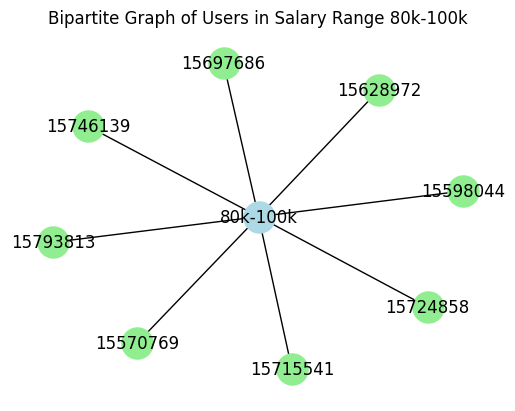

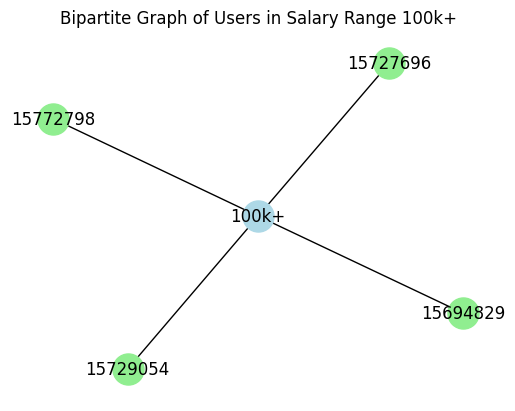

In [ ]:
# Define salary ranges
salary_ranges = {
    '0-20k': (0, 20000),
    '20k-40k': (20000, 40000),
    '40k-60k': (40000, 60000),
    '60k-80k': (60000, 80000),
    '80k-100k': (80000, 100000),
    '100k+': (100000, float('inf'))
}

# Function to get salary range
def get_salary_range(salary, salary_ranges):
    for range_name, (low, high) in salary_ranges.items():
        if low <= salary < high:
            return range_name
    return None

# Function to create and plot graph for a specific salary range
def plot_salary_range_graph(data, salary_range_name, salary_range):
    # Filter data for the specific salary range
    salary_range_data = data[(data['EstimatedSalary'] >= salary_range[0]) & (data['EstimatedSalary'] < salary_range[1])]

    if salary_range_data.empty:
        print(f"No data available for salary range {salary_range_name}")
        return

    # Create bipartite graph
    g4 = nx.Graph()

    # Add salary range node
    g4.add_node(salary_range_name, type='salary_range')

    # Add user nodes with attributes and edges to salary range node
    for index, row in salary_range_data.iterrows():
        user_node = row['User ID']
        g4.add_node(user_node, type='user', gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])
        g4.add_edge(user_node, salary_range_name)

    pos = nx.spring_layout(g4, seed=42)

    # Separate nodes by type for distinct styling
    salary_range_nodes = [node for node, node_data in g4.nodes(data=True) if node_data['type'] == 'salary_range']
    user_nodes = [node for node, node_data in g4.nodes(data=True) if node_data['type'] == 'user']

    # Draw the nodes
    nx.draw_networkx_nodes(g4, pos, nodelist=salary_range_nodes, node_color='lightblue', node_size=500, label='Salary Range')
    nx.draw_networkx_nodes(g4, pos, nodelist=user_nodes, node_color='lightgreen', node_size=500, label='Users')

    # Draw the edges
    nx.draw_networkx_edges(g4, pos)

    # Draw the labels
    nx.draw_networkx_labels(g4, pos)

    # Plot customization
    plt.title(f'Bipartite Graph of Users in Salary Range {salary_range_name}')
    plt.axis('off')
    plt.show()

# Use a subset of the data for the graph
data1 = data.head(50)

# Plot graphs for each salary range
for salary_range_name, salary_range in salary_ranges.items():
    plot_salary_range_graph(data1, salary_range_name, salary_range)


This should be better:


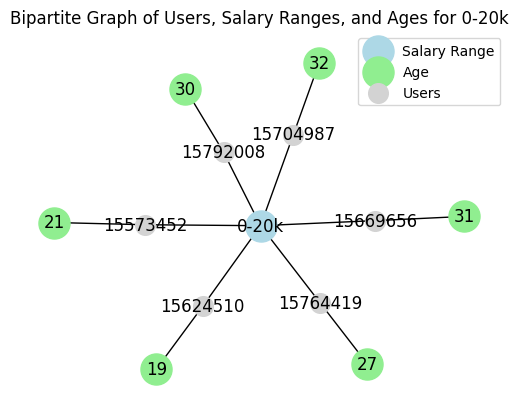

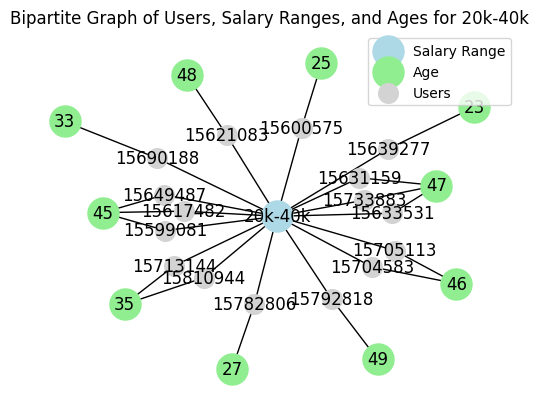

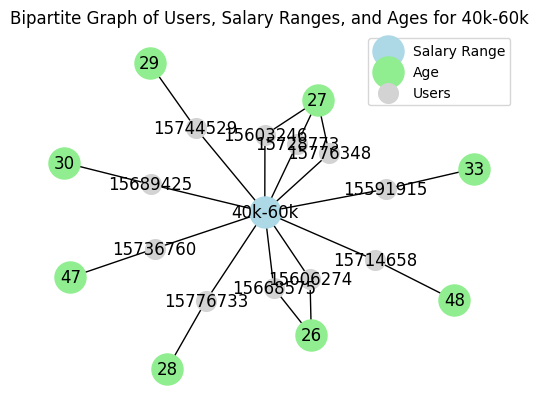

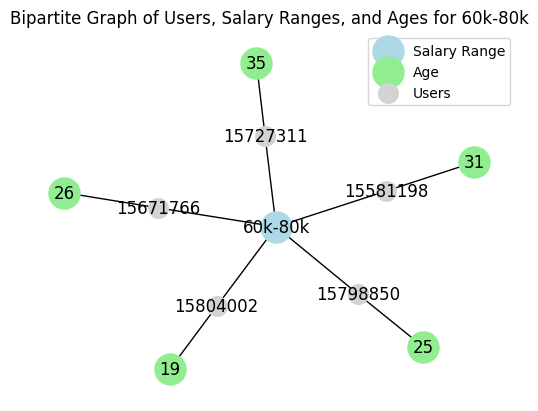

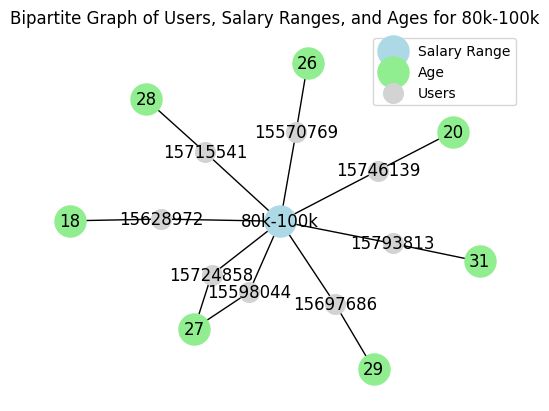

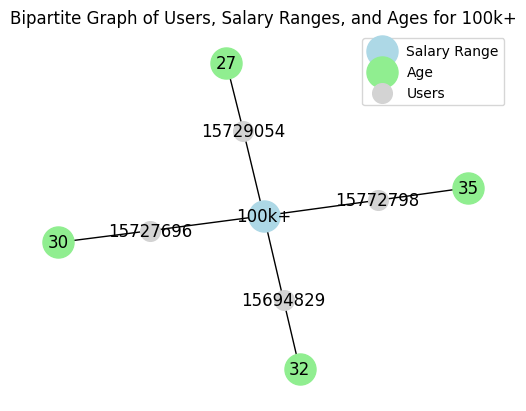

In [23]:

# Define salary ranges
salary_ranges = {
    '0-20k': (0, 20000),
    '20k-40k': (20000, 40000),
    '40k-60k': (40000, 60000),
    '60k-80k': (60000, 80000),
    '80k-100k': (80000, 100000),
    '100k+': (100000, float('inf'))
}

# Function to get salary range
def get_salary_range(salary, salary_ranges):
    for range_name, (low, high) in salary_ranges.items():
        if low <= salary < high:
            return range_name
    return None

# Function to create and plot graph for a specific salary range
def plot_salary_range_graph(data, salary_range_name, salary_range):
    # Filter data for the specific salary range
    salary_range_data = data[(data['EstimatedSalary'] >= salary_range[0]) & (data['EstimatedSalary'] < salary_range[1])]

    if salary_range_data.empty:
        print(f"No data available for salary range {salary_range_name}")
        return

    # Create bipartite graph
    g4 = nx.Graph()

    # Add salary range node
    g4.add_node(salary_range_name, type='salary_range')

    # Add user nodes with attributes and edges to salary range and age nodes
    for index, row in salary_range_data.iterrows():
        user_node = row['User ID']
        g4.add_node(user_node, type='user', gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])
        g4.add_edge(user_node, salary_range_name)  # Connect user node to salary range node
        age_node = row['Age']
        g4.add_node(age_node, type='age')  # Add age node
        g4.add_edge(user_node, age_node)  # Connect user node to age node

    pos = nx.spring_layout(g4, seed=42)

    # Separate nodes by type for distinct styling
    salary_range_nodes = [node for node, node_data in g4.nodes(data=True) if node_data['type'] == 'salary_range']
    age_nodes = [node for node, node_data in g4.nodes(data=True) if node_data['type'] == 'age']
    user_nodes = [node for node, node_data in g4.nodes(data=True) if node_data['type'] == 'user']

    # Draw the nodes
    nx.draw_networkx_nodes(g4, pos, nodelist=salary_range_nodes, node_color='lightblue', node_size=500, label='Salary Range')
    nx.draw_networkx_nodes(g4, pos, nodelist=age_nodes, node_color='lightgreen', node_size=500, label='Age')
    nx.draw_networkx_nodes(g4, pos, nodelist=user_nodes, node_color='lightgray', node_size=200, label='Users')

    # Draw the edges
    nx.draw_networkx_edges(g4, pos)

    # Draw the labels
    nx.draw_networkx_labels(g4, pos)

    # Plot customization
    plt.title(f'Bipartite Graph of Users, Salary Ranges, and Ages for {salary_range_name}')
    plt.axis('off')
    plt.legend()
    plt.show()

# Use a subset of the data for the graph
data1 = data.head(50)

# Plot graphs for each salary range
for salary_range_name, salary_range in salary_ranges.items():
    plot_salary_range_graph(data1, salary_range_name, salary_range)


Remove this last graph?

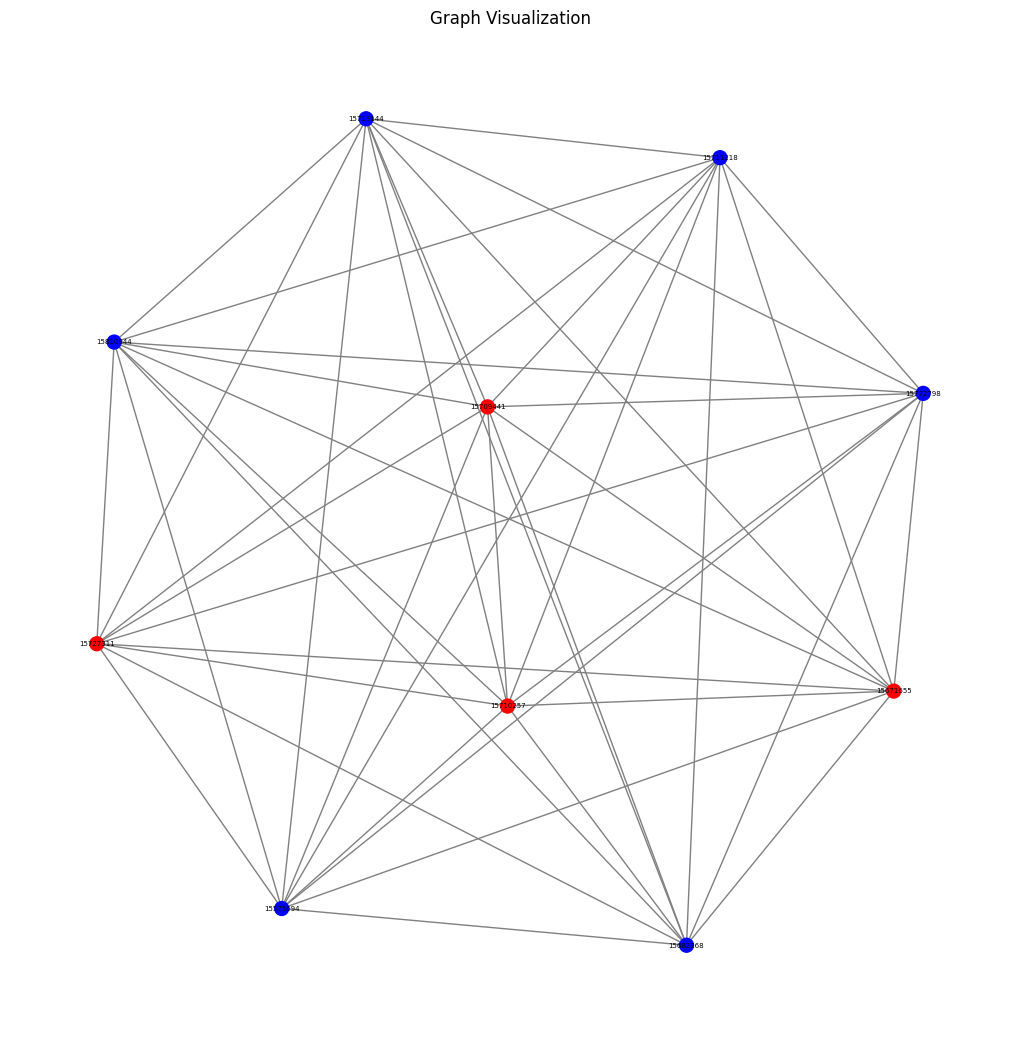

In [ ]:
# Plotting a graph with only the top 10 nodes

top_ten_nodes = list(top_users['User ID'])

new_graph = g.subgraph(top_ten_nodes)

colors_sub = [color_map[new_graph.nodes[node]['gender']] for node in new_graph.nodes]

plt.figure(figsize=(10, 10))
nx.draw(new_graph, with_labels=True, node_size=100, node_color = colors_sub, font_size=5, font_color='black', edge_color='gray')
plt.title('Graph Visualization')
plt.show()

# Visualization

Based on the visualizations above, we can see that there are several emergent clusters based on age; gender (blue represents Male, red represents Female) does not appear to be a contributing factor to the emergence of these clusters. This is further established based on the visualization of the top ten central figures. As we can see, they are all highly connected within their cluster, but gender is not a dividing factor.

In [ ]:
from scipy import stats

# Creating groups based on Gender for a t-test
Male_ID = data[data['Gender'] == 'Male']['degree_centrality']
Female_ID = data[data['Gender'] == 'Female']['degree_centrality']

t_val, p_val = stats.ttest_ind(Male_ID, Female_ID)

print(f"t = {round(t_val, 4)}")
print(f"p = {round(p_val, 2)}")


t = 1.8735
p = 0.06


# T-Test Results

Based on an independent two samples t-test, we can see that the influence of gender is non-significant (though converging on significance) in terms of determining differences in degree centrality among nodes, indicating that other factors, such as age or education, are likely better predictors regarding the relative prominence of nodal connections within clusters.

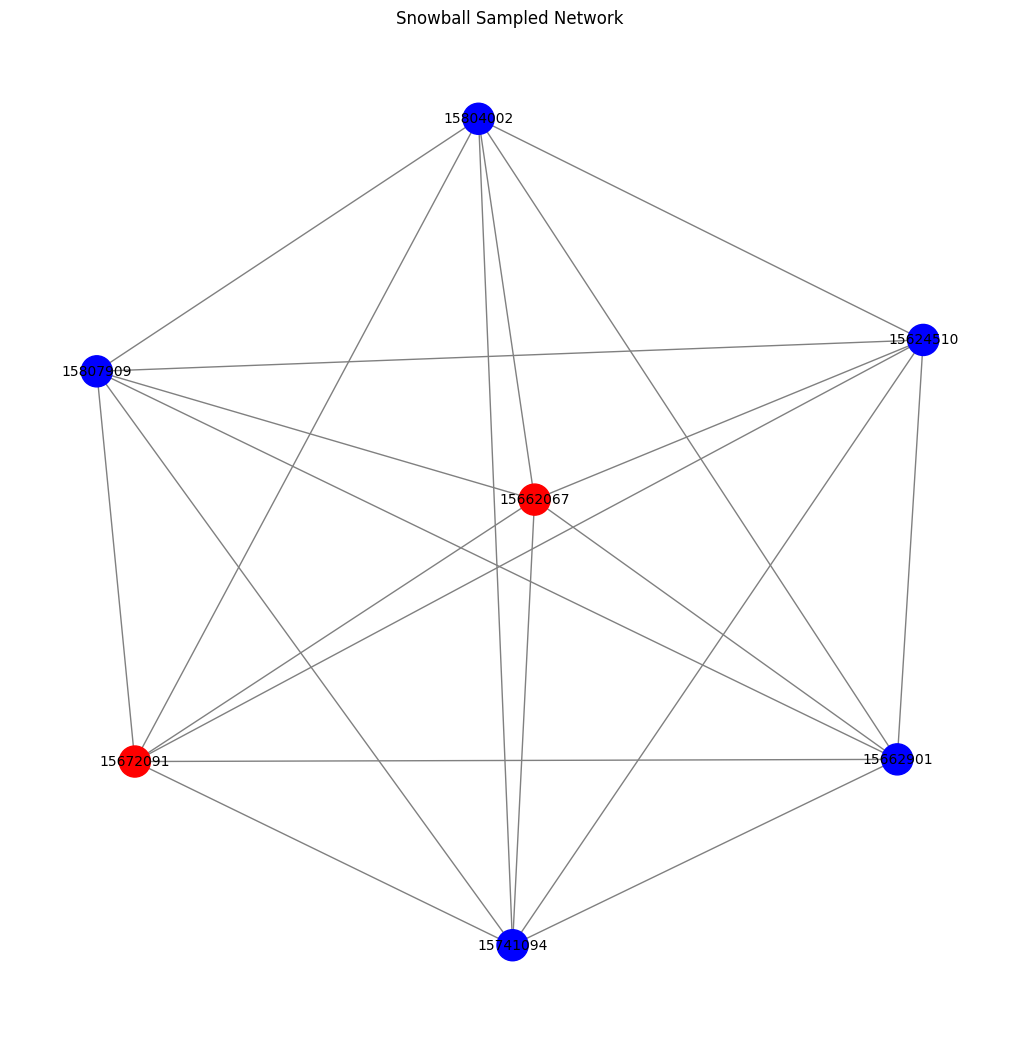

In [ ]:
# Snowball Sampling Function

def snowball_sampling(g, start_node, depth):
    """
    Perform snowball sampling on the graph G starting from start_node up to a given depth.
    """
    layers = {start_node: 0}
    visited = set([start_node])
    current_layer = [start_node]

    for d in range(1, depth + 1):
        next_layer = []
        for node in current_layer:
            neighbors = set(g.neighbors(node)) - visited
            next_layer.extend(neighbors)
            visited.update(neighbors)
        layers.update({n: d for n in next_layer})
        current_layer = next_layer

    sampled_nodes = [node for node, layer in layers.items() if layer <= depth]
    return g.subgraph(sampled_nodes)

# Apply snowball sampling with a start node and depth
start_node = data.iloc[0]['User ID']  # Example start node (first user in the dataset)
depth = 2  # Define the depth of sampling
sampled_graph = snowball_sampling(g, start_node, depth)

# Visualization of the Snowball Sampled Network
color_map = {'Male': 'blue', 'Female': 'red'}
colors_sub = [color_map[sampled_graph.nodes[node]['gender']] for node in sampled_graph.nodes]

plt.figure(figsize=(10, 10))
nx.draw(sampled_graph, with_labels=True, node_size=500, node_color=colors_sub, font_size=10, font_color='black', edge_color='gray')
plt.title('Snowball Sampled Network')
plt.show()


# Snowball Sampling

After performing snowball sampling, the visualization revealed a highly interconnected subgraph with nodes color-coded by gender (blue for Male, red for Female). This dense network highlights key users and their immediate connections. This subset is relevant as it isolates influential nodes, helping us understand their impact on purchasing behavior and develop targeted marketing strategies within their social circles.

How do we interpret these? What do the edges represent - purchases, age, etc.